# Find the best accommodation for students in any other city of your choice by classifying accommodation for incoming students on the basis of their preferences on amenities, budget and proximity to the location

In the fast-moving, effort-intense environment that the average person inhabits, It's a frequent occurrence that one is too tired to fix oneself a home-cooked meal. And of course, even if one gets home-cooked meals every day, it is not unusual to want to go out for a good meal every once in a while for social/recreational purposes. Either way, it's a commonly understood idea that regardless of where one lives, the food one eats is an important aspect of the lifestyle one leads.
<br>


Now, imagine a scenario where a person has newly moved into a new location. They already have certain preferences, certain tastes. It would save both the student and the food providers a lot of hassle if the student lived close to their preferred outlets. Convenience means better sales, and saved time for the customer.
<br>

Food delivery apps aside, managers of restaurant chains and hotels can also leverage this information. For example, if a manager of a restaurant already knows the demographic of his current customers, they'd ideally want to open at a location where this demographic is at its highest concentration, ensuring short commute times to the location and more customers served.If potential hotel locations are being evaluated, a site that caters to a wide variety of tastes would be ideal, since one would want every guest to have something to their liking.

Student responses in the dataset are numerically encoded, to get reference to the actual answers, refer to the file <a target="_blank" href="./codebook_food.docx">Codebook food docs</a>

## Install required libraries for data analysis

In [1]:
!pip install pandas numpy matplotlib seaborn --quiet

## Import the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
# show all rows in the data set
pd.set_option('display.max_rows', None)

# Data Cleaning

## Set filepath to access data

In [3]:
path = "food_coded.csv" # name of the dataset
base_path = os.getcwd() # get current directory
file_path = os.path.join(base_path,path) # merge the paths
file_path

'/home/dibyamohan/EDA_Geolocation/food_coded.csv'

## Read the csv file


In [4]:
student_data = pd.read_csv(file_path) # read data from csv to dataframe
student_data

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
9,3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125


## Filter the columns which are needed for analysis

There are around 61 parameters to choose from. However, we need only those which are relevant to the result we are looking for

In [5]:
food_choices = student_data.loc[:, ["cook","eating_out","employment","ethnic_food","exercise","fruit_day","income","on_off_campus","pay_meal_out","sports","veggies_day"]]
food_choices

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
5,3.0,1,3.0,4,2.0,2,1.0,1.0,5,2.0,1
6,2.0,2,3.0,5,1.0,4,4.0,2.0,2,1.0,4
7,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4
8,3.0,5,2.0,5,NaN,4,5.0,1.0,3,2.0,3
9,3.0,3,3.0,5,1.0,5,4.0,1.0,3,1.0,5


## Find the columns having at least one NaN value
Find all the columns with missing data and handle them

In [6]:
nan_values = food_choices.isna() # returns boolean values for every column 
nan_columns = nan_values.any() # checks if any column is true
columns_with_nan = food_choices.columns[nan_columns].tolist() # filter true values and convert to list
columns_with_nan 

['cook', 'employment', 'exercise', 'income', 'on_off_campus', 'sports']

## Replace each NaN value with the average value of that column

#### Other methods to replace NaN values
- Use the ‘most frequent’ value from each column
- Use ‘interpolation’ in each column (df.interpolate) - more computative
- K-nearest neighbour (Impute new values from neighbouring values) using KNNImputer

KNN algorithms are helpful for large datasets

In [7]:
for col in columns_with_nan:
    mean_value = food_choices[col].mean(skipna=True) # find avearage skipping NaN values
    food_choices[col].fillna(float(round(mean_value)),inplace=True) # replace each missing NaN with the average of its column
food_choices

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
5,3.0,1,3.0,4,2.0,2,1.0,1.0,5,2.0,1
6,2.0,2,3.0,5,1.0,4,4.0,2.0,2,1.0,4
7,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4
8,3.0,5,2.0,5,2.0,4,5.0,1.0,3,2.0,3
9,3.0,3,3.0,5,1.0,5,4.0,1.0,3,1.0,5


# Data Visualisation and Exploration

<img src="./boxplot.png" alt="Box plot Demo" align="left" width="600px">

## Box Plot
It can tell us at glance where the population is concentrated, and how the outliers compare to the average object in the group

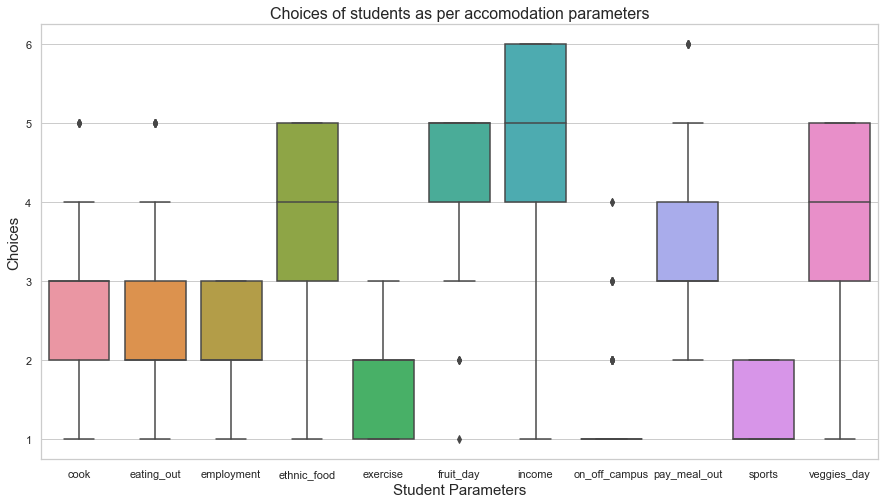

In [16]:
sns.set_style(style="whitegrid",rc = {'figure.figsize':(15,8)}) # set plot style
sns.boxplot(x="variable",y="value", data=pd.melt(food_choices)) # prepare to plot
plt.xlabel("Student Parameters", fontsize= 15) # set labels
plt.ylabel("Choices", fontsize= 15)
plt.title("Choices of students as per accomodation parameters", fontsize= 16)
plt.show() # display box plot

# Run K-means Clustering on the data
K Means Clustering will help us group locations based on the amenities located around them. For example, a location with a high amount of shops nearby will be labeled "Amenity Rich" while a location with less amenities will be labeled "Amenity Poor". Similar locations will be grouped (clustered) together.

<blockquote>Note: Here, we are applying K means first on the dataset of the general population, which will help us organise the population into groups. Further down the line, we will apply K means again on a different dataset.</blockquote>